In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('mushrooms.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
X=df.drop('class' , axis=1)
X=pd.get_dummies(X , drop_first=True)
y=df['class']

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test=train_test_split(X , y , random_state=101 , test_size=0.15)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
gb_model=GradientBoostingClassifier()
param_grid={'n_estimators':[1,3,5,10,50,73,95,100], 'max_depth':[1,3,5,6]}
grid_model=GridSearchCV(gb_model , param_grid , cv=10)
grid_model.fit(X_train , y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 3, 5, 6],
                         'n_estimators': [1, 3, 5, 10, 50, 73, 95, 100]})

In [6]:
grid_model.best_params_

{'max_depth': 3, 'n_estimators': 95}

In [7]:
grid_model.best_estimator_.feature_importances_

array([2.91164512e-04, 1.29114372e-16, 0.00000000e+00, 0.00000000e+00,
       4.94332937e-17, 1.04907744e-03, 3.01105669e-17, 1.27741088e-06,
       0.00000000e+00, 0.00000000e+00, 3.30475395e-17, 0.00000000e+00,
       5.00372933e-18, 0.00000000e+00, 0.00000000e+00, 3.34895549e-08,
       2.31065289e-03, 5.21245020e-02, 1.81664055e-04, 1.74478761e-02,
       1.82508840e-02, 3.06345963e-04, 6.14774605e-01, 8.63892414e-03,
       0.00000000e+00, 0.00000000e+00, 4.97405061e-18, 1.25073562e-02,
       1.06374909e-02, 0.00000000e+00, 1.86074532e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.16601221e-17,
       7.46559875e-18, 0.00000000e+00, 1.86054832e-17, 0.00000000e+00,
       0.00000000e+00, 3.48090602e-04, 1.36025953e-01, 0.00000000e+00,
       3.24534405e-02, 2.52893450e-03, 2.80087209e-03, 4.95088144e-06,
       0.00000000e+00, 0.00000000e+00, 3.36464024e-02, 3.13516275e-03,
       0.00000000e+00, 0.00000000e+00, 6.76512155e-04, 0.00000000e+00,
      

In [8]:
feature_imp=pd.DataFrame(data=grid_model.best_estimator_.feature_importances_ , index=X.columns , columns=['importance'])

In [9]:
feature_imp.describe()

,importance
count,9.500000e+01
mean,1.052632e-02
std,6.464499e-02
min,0.000000e+00
25%,0.000000e+00
50%,1.291144e-16
75%,6.974146e-04
max,6.147746e-01


(0.0, 0.001)

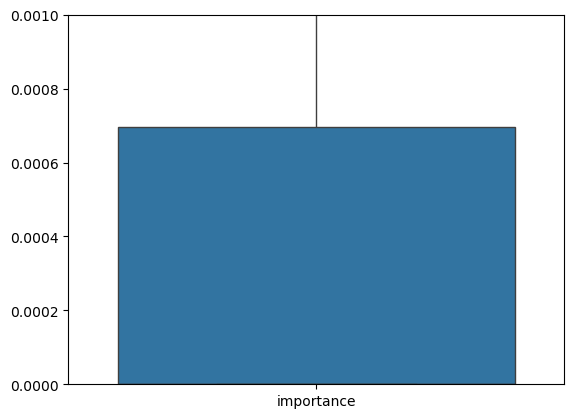

In [10]:
sns.boxplot(feature_imp)
plt.ylim(0,0.001)

In [12]:
feature_imp[feature_imp['importance']<0.0002]

,importance
cap-shape_f,1.291144e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,4.943329e-17
cap-surface_s,3.011057e-17
...,...
habitat_l,0.000000e+00
habitat_m,2.726402e-16
habitat_p,0.000000e+00
habitat_u,1.004901e-05


In [18]:
feature_imp=feature_imp[feature_imp['importance']>0.0002].sort_values('importance')
feature_imp

,importance
spore-print-color_n,0.000208
spore-print-color_k,0.000213
cap-shape_c,0.000291
odor_m,0.000306
stalk-root_b,0.000348
stalk-color-below-ring_c,0.000353
stalk-color-above-ring_n,0.000677
population_v,0.000718
cap-surface_g,0.001049
population_c,0.001142


In [14]:
feature_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, odor_n to spore-print-color_n
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   importance  31 non-null     float64
dtypes: float64(1)
memory usage: 496.0+ bytes


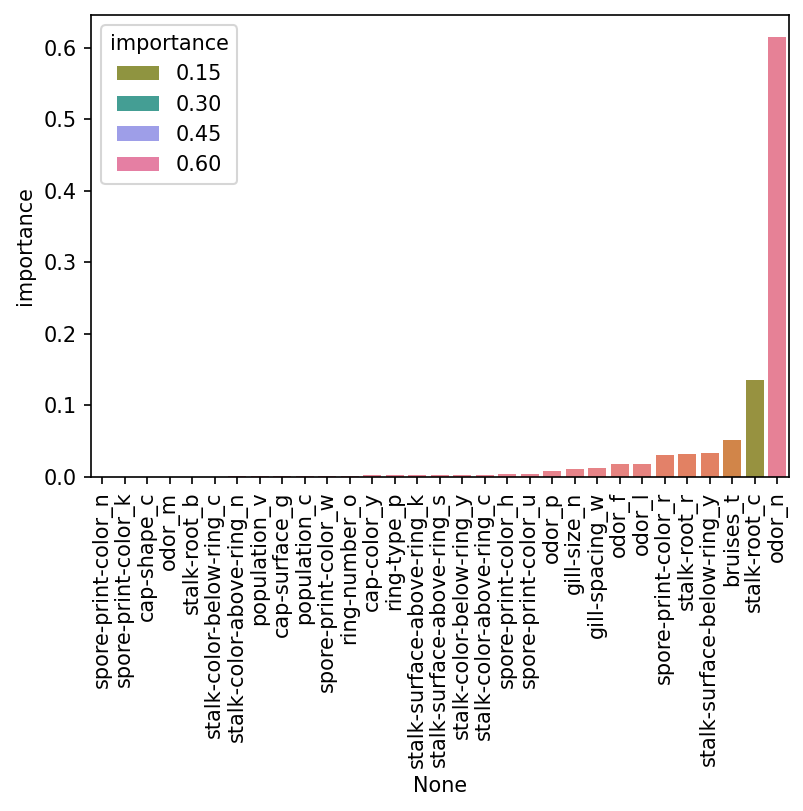

In [25]:
plt.figure(figsize=(6,4), dpi=150)
sns.barplot(data=feature_imp , x=feature_imp.index , y='importance' , hue='importance' , palette='husl')
plt.xticks(rotation=90);